# Introduction

La régression linéaire est le modèle de Machine Learning le plus simple pour prédire des valeurs continues. Elle permet d'apprendre la relation entre une variable dépendante et une ou plusieurs variables indépendantes aussi appellées variables explicatives. Il est aussi important de noter que ce type de modèle fonctionne bien quand la dite relation est linéaire.

Les objectifs du cours sont listés ci-dessous:
- Situer la régression lineaire dans le paysage des algorithmes de Machine Learning
- Comprendre dans quel contexte utiliser la regression lineaire
- Entrainer un modele de régression lineaire
- Evaluer les performances du modèle afin de l'améliorer


##### Importation de librairies

In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import matplotlib
from IPython.display import display, HTML

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
display(HTML("<style>.container { width:95% !important; }</style>"))
matplotlib.rcParams.update({'font.size': 22})

## 1. Quelle fonction pour quel dataset?

Ci-dessous vous pouvez observer 3 jeux de donnees differents. 
   
    Question:
    - Pouvez vous reconnaitre des fonctions usuelles qui suivent la tendance de ces nuages de points?

In [ ]:
VERBOSE = True

In [ ]:
## Exemple de nuages de points

fonctions = [np.cos,np.exp, lambda x: 2 * x + 3]
X = [np.linspace(-2 * np.pi, 2 * np.pi, 100), np.linspace(-2, 3, 100), np.linspace(-10, 10, 100)]
noise = [3, 0.6, 0.2]
titles = ['dataset 1', 'dataset 2', 'f(x) = dataset 3' ]

if VERBOSE:
    plt.figure(figsize = (30, 7))
    for k in range(len(fonctions)):
        plt.subplot(1, 3, k+1)
        plt.scatter(X[k], fonctions[k](X[k])+np.random.randn(100)/noise[k])
        plt.title(titles[k])
        plt.ylabel('Y')
        plt.xlabel('X')
        plt.grid(True)


Nous pouvons observer que pour chaque element x nous pourrions, a une erreur pres, predire la valeur de y, moyennant une fonction ${f}$ à definir telle que:
 $$ Y \simeq {f}(X) $$


**Approcher un nuage de point par une fonction lineaire des variables d'entrée (X) s'appelle "regression linéaire". X est la variable explicative et Y est la variable que la fonction ${f}$ tente d'approcher. Y est une variable continue, c'est la variable à expliquer.**

<center>

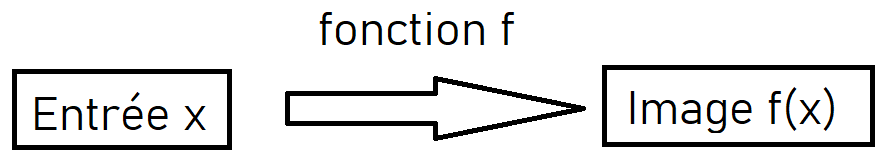  

</center>


In [ ]:
## Exemple de fonctions 

fonctions = [np.cos, np.exp, lambda x: 2 * x + 3]
X = [np.linspace(-2 * np.pi, 2 * np.pi, 100), np.linspace(-2, 3, 100), np.linspace(-10, 10, 100)]

titles = ['y ~ f(x) = Cos(x)', 'y ~ f(x) = exp(x)', 'y ~ f(x) = 2x + 3' ]

if VERBOSE:
    plt.figure(figsize = (30, 7))
    for k in range(len(fonctions)):
        plt.subplot(1, 3, k+1)
        plt.plot(X[k], fonctions[k](X[k]))
        plt.scatter(X[k], fonctions[k](X[k])+np.random.randn(100)/noise[k])
        plt.title(titles[k])
        plt.grid(True)


    Question:
    - Quelle figure se prete le mieux a l'utilisation d'une regression lineaire ?

### Example d'un dataset propice a l'utilisation de la regression lineaire


Etant donne deux variables ${X}$ et ${Y}$ representes dans le nuage de points ci-dessous, nous allons essayer de trouver des fonctions affines qui permettraient d'expliquer leur relation au mieux. Par expliquer nous entendons permettre une bonne approximation de ${f(X)}$ pour chaque valeurde ${X}$

In [ ]:
np.random.seed(42)

X = np.random.randn(50)
Y = 3 * X + np.random.randn(50) / 0.5

if VERBOSE:
    plt.figure(figsize=(12, 7))
    plt.grid(True)

    plt.scatter(X, Y)
    plt.ylabel('Y')
    plt.xlabel('X')

Nous allons positionner 3 variantes de la fonction ${f}$ parmi les fonctions affines.

    Question:
    - Quelle fonction vous semble la plus appropriée et pourquoi?

In [ ]:
params = [(2, 3), (3, 0), (1, -2)]

if VERBOSE:
    plt.figure(figsize=(40, 7))
    plt.grid(True)

    for k in range(len(params)):
        plt.subplot(1, 3, k+1)
        plt.grid(True)
        plt.scatter(X, Y, label='échantillon')
        plt.ylabel('Y')
        plt.xlabel('X')

        plt.plot(np.linspace(-3, 3, 100), params[k][0] * np.linspace(-3, 3, 100) + params[k][1], label='prédiction', color='red')

        plt.title('Modèle $\hat{f}$ ' + str(k))
        plt.legend()

##### Points extrémaux ou outliers

Nous ajoutons au jeux de données deux points relativement éloignés du nuage de point original.

Que pouvez vous observer comme impact sur la droite de regression? Comment l'expliquez vous?

In [ ]:
X = np.random.randn(50)
Y = 3 * X + np.random.randn(50) / 0.5

X = np.hstack((X, np.array([1, -1])))
Y = np.hstack((Y, np.array([20, -30])))

params = [ (3, 0), (13, 0)]

if VERBOSE:
    plt.figure(figsize=(40, 7))
    plt.grid(True)

    
    plt.subplot(1, 3, 1)
    plt.grid(True)
    plt.scatter(X, Y, label='échantillon')
    plt.ylabel('Y')
    plt.xlabel('X')

    plt.plot(np.linspace(-3, 3, 100), params[0][0] * np.linspace(-3, 3, 100) + params[0][1], label='pred sans extrémaux', color='red')
    plt.plot(np.linspace(-3, 3, 100), params[1][0] * np.linspace(-3, 3, 100) + params[1][1], label='pred avec extrémaux', color='green')

    plt.title('\nModèle avec et sans extrémaux\n')
    plt.legend()
    

**Dans ce qui precede les droites ont ete definie manuellement. La regression lineaire en tant que modele de Machine Learning, nous permettra de trouver automatiquement la droite optimale.**

# 2. Sujet: la consommation de poulet dans differents pays

Dans cette section, vous allez travailler sur un jeux de données qui represente la consommation de poulets dans differents pays.

L'objectif est d'étudier la relation entre la population et le nombre de poulet d’élevage pour chaque pays. Pour cela, vous allez:

- Explorer les donnees en utilisant les statistiques descriptives et en les visualisant
- Pretraiter les donnees et evaluer l'impact des traitements effectues sur les modeles entraines

## 2.1 Regression Lineaire sur le dataset brut
<a name="Desc"></a>

### 2.1.1 - Description du dataset
Chargez les données et faites une analyse descriptive:

In [ ]:
FIGSIZE = (10,8)

PREDICTOR_COL = "Population"
TARGET_COL = "taille du bétail"

In [ ]:
csv_kwargs = dict(sep=";", encoding = "ISO-8859-1")

In [1]:
path_data = 'chicken.csv'

In [ ]:
chicken = pd.read_csv(
    path_data,
    **csv_kwargs,
)

Etudions à quel point une population donnée **( colonne "Population" )** influence la taille du bétail **( colonne "taille du bétail" )**. Chaque ligne du dataframe donne un point de mesure.

In [ ]:
if VERBOSE:
    display(chicken.head())

In [ ]:
chicken[chicken.Pays == "Bénin"]

In [ ]:
expected_shape = (27, 5)
np.testing.assert_allclose(chicken.shape, expected_shape)

In [ ]:
if VERBOSE:
    display(chicken.describe())

Entrainons un modele de regression lineaire sur le jeux de donnees original:

In [ ]:
X, y = chicken[[PREDICTOR_COL]], chicken[TARGET_COL]

### 2.1.2 - Trouver le modele de regression lineaire adequat

Faire de la regression lineaire revient a trouver l'equation de la droite qui relie la variable X - la colonne **"Population"** - et la valeur y correspondante -la colonne **"taille du betail"**.

La droite ayant pour equation: 
 $$ y = aX +b $$    
où ${a}$ et ${b}$ sont les parametres du modele de regression lineaire.

Il faut donc trouver les valeurs de ${a}$ et de ${b}$ de facon a representer au mieux possible le lien entre ${X}$ et ${y}$.

        Question: 
        - Que veut dire representer au mieux possible ce lien?
        - Comment trouver les parametres ${a}$ et ${b}$ ?
        

In [ ]:
regressor = LinearRegression()
# Calibrage du modèle: détermination des coefficient
regressor.fit(X, y)

In [ ]:
Y_model_brut = regressor.predict(X)

In [ ]:
expected_Y_model_brut = [
    24091.02145505, 40041.13285114, 23398.39806068, 50728.99533875,
    31732.93242199, 12027.10060843, 50473.22319344,  5968.03043839,
    6264.57263501, 59790.95931973, 25866.11507505,  5497.21641372,
    6020.92308998, 11214.53627852, 14951.36859462, 52727.20527764,
    38686.66004113, 10379.73193036, 72641.27965191, 58851.10171908,
    6639.9654437 , 44833.65387539, 30882.21392841, 83049.33366681,
    17174.87509033, 24604.72808018, 83743.72552058
]
np.testing.assert_allclose(Y_model_brut, expected_Y_model_brut)

In [ ]:
# Visualisation
if VERBOSE:
    fig, ax = plt.subplots(1,1, figsize=FIGSIZE)
    ax.plot(chicken[PREDICTOR_COL], chicken[TARGET_COL], "o", label='échantillon')
    ax.plot(chicken[PREDICTOR_COL], Y_model_brut, label='prédiction_brut')
    plt.xlabel(PREDICTOR_COL)
    plt.legend()
    plt.ylabel(TARGET_COL)
    plt.show()


        Question: 
        - Que peut-on dire de la distribution des points dans l'espace?

### 2.1.3 - Evaluation du modele

    Question:
    - Comment pouvons nous evaluer la qualite du modele entraine?

Il existe plusieurs metriques pour evaluer la qualite d'un modele de regression.

Exemple:
- RMSE
- R2

Le R2 score (ou coefficient de determination) est souvent utilise pour les regressions lineaires. Il s'agit d'un score qui prend des valeurs entre 0 et 1, 1 etant la valeur parfaite.

Dans ce qui suit, nous utiliserons l'implementation disponible sur sklearn pour mesurer la performance des modeles.


In [56]:
from sklearn.metrics import r2_score
r2_score(chicken[TARGET_COL],Y_model_brut)

0.3369411405108318

## 2.3 Elimination des valeurs extrêmes

 Comme nous l'avons vu dans les sections precedentes, la presence de points extremaux (outliers) peut avoir un impact sur la qualite du modele de regression obtenu. 
 
 Dans cette section nous allons explorer differents moyens de verifier la presence de points extremaux.

### 2.3.1 - Identification des valeurs extrêmes

Le boxplot est une maniere de visualiser la distribution d'un jeux de donnees, et d'identifier les outliers.

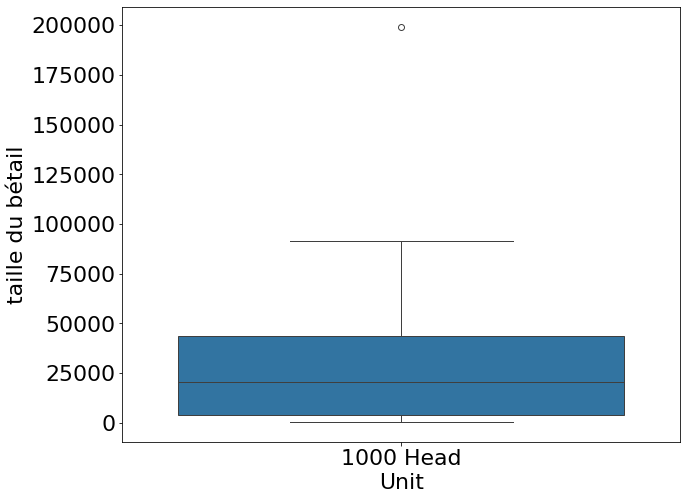

In [57]:
if VERBOSE:
    fig, ax = plt.subplots(figsize=FIGSIZE)
    sns.boxplot(y=TARGET_COL, x="Unit", data=chicken, ax=ax)
    plt.show()

In [58]:
df_chicken_sorted = chicken.sort_values(by=TARGET_COL, ascending=False)
df_chicken_sorted.head()

,Code,Pays,Population,taille du bétail,Unit
18,MAR,Maroc,35581294,199186,1000 Head
25,TUN,Tunisie,11433443,91215,1000 Head
9,GHA,Ghana,29121471,74478,1000 Head
6,CIV,Côte d'Ivoire,24437469,70042,1000 Head
3,CMR,Cameroun,24566045,51100,1000 Head


In [59]:
highests = df_chicken_sorted.head(1)
highests

,Code,Pays,Population,taille du bétail,Unit
18,MAR,Maroc,35581294,199186,1000 Head


In [60]:
expected_code_countries = {18: 'MAR'}
assert highests["Code"].to_dict() == expected_code_countries

### 2.3.2 - Visualisation de la relation entre les variables

In [61]:
outliers_labels = {}
for outlier in highests.to_dict(orient="records"):
    outlier_label = dict(
        x=outlier[PREDICTOR_COL]+100,
        y=outlier[TARGET_COL]+10,
        s=outlier["Pays"]
    )
    outliers_labels[outlier["Code"]] = outlier_label

In [62]:
outliers_labels

{'MAR': {'x': 35581394, 'y': 199196, 's': 'Maroc'}}

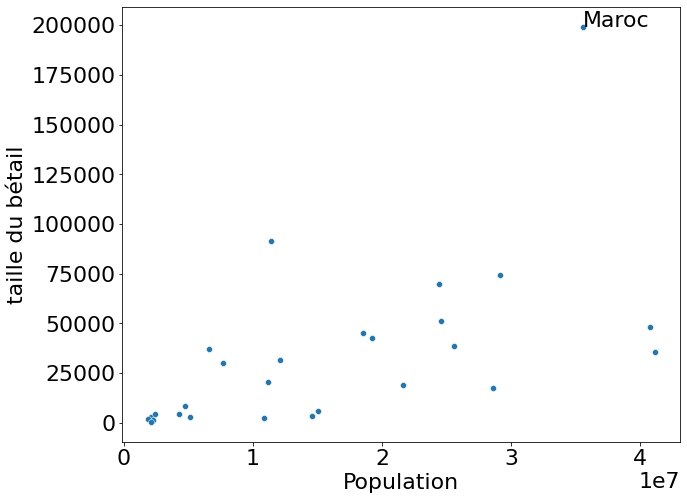

In [63]:
if VERBOSE:
    fig, ax = plt.subplots(figsize=FIGSIZE)
    sns.scatterplot(data=chicken, x=PREDICTOR_COL, y=TARGET_COL, ax=ax)
    for country_code in outliers_labels:
        plt.text(**outliers_labels[country_code])

    plt.show()

### 2.3.3 - Construction du modèle
<a name="Construction"></a>

Le Maroc etant considere comme un outlier, nous eliminons la ligne correspondante avant de reiterer sur une nouvelle recherche de droite de regression.

In [64]:
df = chicken.drop(highests.index)
X, y = df[[PREDICTOR_COL]], df[TARGET_COL]

In [65]:
assert ("MAR" not in df["Code"].unique())

#### Calibrage et prédiction du modèle

In [66]:
# Ajouter du code pour calibrer le nouveau modele "regressor_noMAR"

In [67]:
# Reponse:
regressor_noMAR = LinearRegression()
# Calibrage du modèle: détermination des coefficient
regressor_noMAR.fit(X, y)
Y_model_noMAR = regressor_noMAR.predict(X)

In [68]:
Y_model_noMAR = regressor_noMAR.predict(X)

In [69]:
expected_Y_model_noMAR = [
    22074.98251416, 31907.61136427, 21648.00688995, 38496.26660509,
    26785.92605415, 14638.04033764, 38338.59293671, 10902.85713551,
    11085.66396898, 44082.61808975, 23169.25930673, 10612.61843767,
    10935.46341638, 14137.12574999, 16440.73882998, 39728.08600784,
    31072.63108748, 13622.50104839, 43503.23210744, 11317.07916535,
    34862.01583942, 26261.49089532, 58420.50933907, 17811.44487555,
    22391.66284681, 58848.57515034
]
np.testing.assert_allclose(Y_model_noMAR, expected_Y_model_noMAR)

### 2.3.4 - Evaluation du modele

In [72]:
# ICI ajouter du code pour :
# - afficher la distribution originale
# - la prediction avant elimination de la ligne "Maroc"
# - la prediction apres elimination de la ligne "Maroc"
# - afficher le R2 score

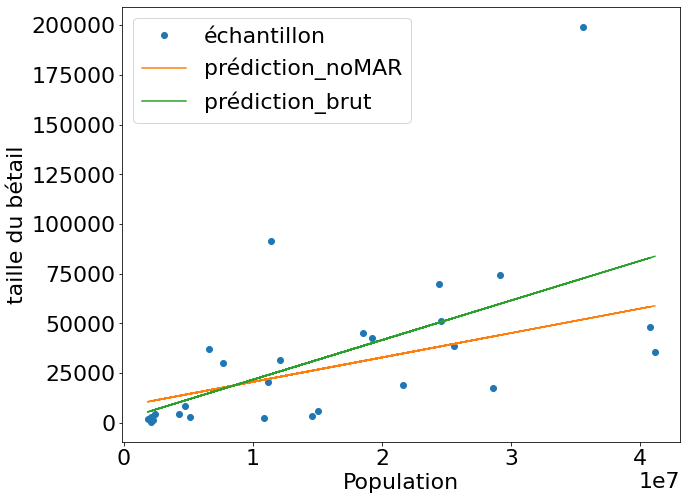

In [71]:
# Reponse
# Visualisation
if VERBOSE:
    fig, ax = plt.subplots(1,1, figsize=FIGSIZE)
    ax.plot(chicken[PREDICTOR_COL], chicken[TARGET_COL], "o", label='échantillon')
    ax.plot(df[PREDICTOR_COL], Y_model_noMAR, label='prédiction_noMAR')
    ax.plot(chicken[PREDICTOR_COL], Y_model_brut, label='prédiction_brut')
    plt.xlabel(PREDICTOR_COL)
    plt.legend()
    plt.ylabel(TARGET_COL)
    plt.show()


In [74]:
r2_score(df[TARGET_COL],Y_model_noMAR)

0.31377563614545356

    Question:
    - Maintenant que l'outlier "MAROC" a ete elimine, que pouvez vous dire du reste du nuage de points?

## 2.4 - Elimination d'un outlier par visualisation du nuage de points

Dans  cette derniere partie et en vous inspirant du code precedent, vous devez ecrire le code pour:
- Eliminer le potentiel outlier additionnel du dataset. 

**Note:** vous pouvez copier le dataset dans u nouveau dataframe afin de preserver l'historique des operations precedentes du notebook

- trouver un nouveau modele de regression lineaire correspondant au nouveau jeux de donnees
- afficher sur le meme graphe:
    - la droite issue de la premiere regression appliquee au dataset brut
    - La droite issue de la seconde regression appliquee au dataset dont l'outlier "Maroc" a ete elimine
    - La droite issue de la troisieme regression que vous aurez codee

    Question:
    - Quelles differences observez vous entre les 3 droites?
    - Que pouvez vous dire du coefficient R2 pour chacun des 3 modeles?

In [75]:
df2 = df.copy()

In [76]:
df2_sorted = df2.sort_values(by=TARGET_COL, ascending=False)

highests = df2_sorted.head(1)
highests

,Code,Pays,Population,taille du bétail,Unit
25,TUN,Tunisie,11433443,91215,1000 Head


In [77]:
expected_code_countries = {25: 'TUN'}
assert highests["Code"].to_dict() == expected_code_countries

In [78]:
outliers_labels = {}
for outlier in highests.to_dict(orient="records"):
    outlier_label = dict(
        x=outlier[PREDICTOR_COL]+100,
        y=outlier[TARGET_COL]+10,
        s=outlier["Pays"]
    )
    outliers_labels[outlier["Code"]] = outlier_label

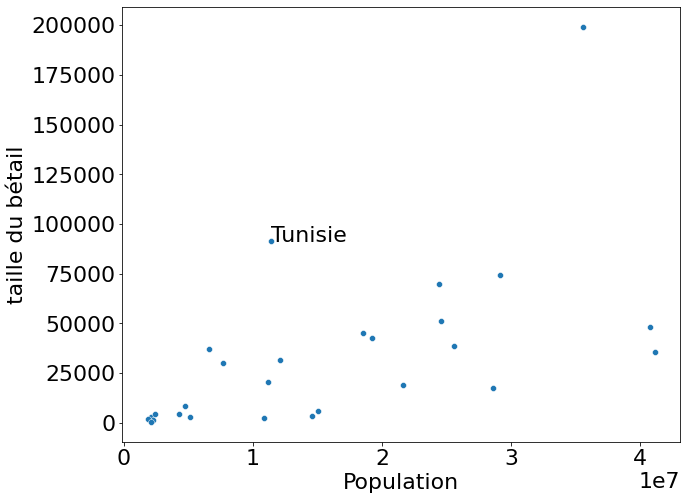

In [79]:
if VERBOSE:
    fig, ax = plt.subplots(figsize=FIGSIZE)
    sns.scatterplot(data=chicken, x=PREDICTOR_COL, y=TARGET_COL, ax=ax)
    for country_code in outliers_labels:
        plt.text(**outliers_labels[country_code])

    plt.show()



In [80]:
df2 = df2.drop(highests.index)
X, y = df2[[PREDICTOR_COL]], df2[TARGET_COL]

In [81]:
assert ("TUN" not in df2["Code"].unique())

In [82]:
regressor_noTUN_noMAR = LinearRegression()
# Calibrage du modèle: détermination des coefficient
regressor_noTUN_noMAR.fit(X, y)

LinearRegression()

In [83]:
Y_model_noTUN_noMAR = regressor_noTUN_noMAR.predict(X)

In [84]:
expected_Y_model_noTUN_noMAR = [
    19039.50424144, 29456.62073701, 18587.14761474, 36436.9298933 ,
    24030.48360293, 11160.48285208, 36269.88352178,  7203.26661398,
    7396.94015841, 42355.35466942, 20198.82887378,  6895.77505979,
    7237.81113218, 10629.79205785, 13070.3403772 , 37741.97317476,
    28572.00615962, 10084.57617003, 41741.52785203,  7642.11152571,
    32586.64588714, 23474.87408821, 57545.54294173, 14522.52623467,
    57999.05456022
]
np.testing.assert_allclose(Y_model_noTUN_noMAR, expected_Y_model_noTUN_noMAR)

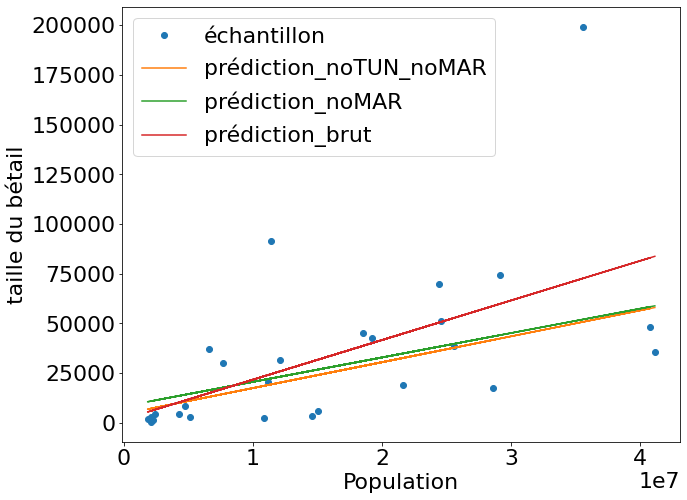

In [85]:
# Visualisation
if VERBOSE:
    fig, ax = plt.subplots(1,1, figsize=FIGSIZE)
    ax.plot(chicken[PREDICTOR_COL], chicken[TARGET_COL], "o", label='échantillon')
    ax.plot(df2[PREDICTOR_COL], Y_model_noTUN_noMAR, label='prédiction_noTUN_noMAR')
    ax.plot(df[PREDICTOR_COL], Y_model_noMAR, label='prédiction_noMAR')
    ax.plot(chicken[PREDICTOR_COL], Y_model_brut, label='prédiction_brut')
    plt.xlabel(PREDICTOR_COL)
    plt.legend()
    plt.ylabel(TARGET_COL)
    plt.show()


In [87]:
r2_score(df2[TARGET_COL],Y_model_noTUN_noMAR)

0.4766331227155435

---
# Fin du cours
---